In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Chemin vers le dataset
dataset_path = r"C:\Users\HP\Downloads\archive\Breast Cancer (KAUH)\aug_KAUH-BCMD\aug_KAUH-BCMD"

# Catégories et labels
categories = ["Aug.Benign", "Aug.Malignant"]
labels_dict = {"Aug.Benign": 0, "Aug.Malignant": 1}

# Initialisation des listes
images = []
labels = []

# Chargement et prétraitement des images
for category in categories:
    category_path = os.path.join(dataset_path, category)
    label = labels_dict[category]
    
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        
        try:
            # Lecture et redimensionnement de l'image
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))
            
            # Normalisation des pixels
            img = img / 255.0
            
            # Ajout aux listes
            images.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Erreur lors du traitement de l'image {img_name}: {e}")

# Conversion en tableaux NumPy
images = np.array(images, dtype=np.float32)
labels = np.array(labels)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

print(f"Nombre d'images chargées : {len(images)}")
print(f"Forme des images : {X_train.shape}")
print(f"Forme des labels : {y_train.shape}")
print("Données prêtes pour l'entraînement !")


Nombre d'images chargées : 12400
Forme des images : (11160, 128, 128, 3)
Forme des labels : (11160,)
Données prêtes pour l'entraînement !


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import Input

# Construction du modèle CNN
model = models.Sequential([
    Input(shape=(128, 128, 3)),  # Utilisez Input pour spécifier la forme d'entrée
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Affichage de l'architecture du modèle
model.summary()

# Entraîner le modèle
history = model.fit(
    X_train, y_train,
    epochs=10,  # Nombre d'epochs
    batch_size=32,  # Taille du batch
    validation_data=(X_test, y_test)  # Données de validation
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 95s 263ms/step - accuracy: 0.5557 - loss: 0.6873 - val_accuracy: 0.6532 - val_loss: 0.6212
Epoch 2/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 88s 253ms/step - accuracy: 0.6798 - loss: 0.5910 - val_accuracy: 0.7460 - val_loss: 0.5001
Epoch 3/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 88s 251ms/step - accuracy: 0.7956 - loss: 0.4399 - val_accuracy: 0.8685 - val_loss: 0.3178
Epoch 4/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 86s 247ms/step - accuracy: 0.8954 - loss: 0.2611 - val_accuracy: 0.9218 - val_loss: 0.2113
Epoch 5/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 87s 249ms/step - accuracy: 0.9438 - loss: 0.1489 - val_accuracy: 0.9395 - val_loss: 0.1558
Epoch 6/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 87s 249ms/step - accuracy: 0.9646 - loss: 0.0941 - val_accuracy: 0.9444 - val_loss: 0.1552
Epoch 7/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 86s 247ms/step - accuracy: 0.9740 - loss: 0.0656 - val_accuracy: 0.9524 - val_loss: 0.1525
Epoch 8/10
349/349 ━━━━━━━━━━━━━━━━━━━━ 87s 249ms/step - accuracy: 0.9844 - loss: 0

In [3]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Précision sur les données de test : {test_acc:.4f}")

39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.9604 - loss: 0.1171
Précision sur les données de test : 0.9573


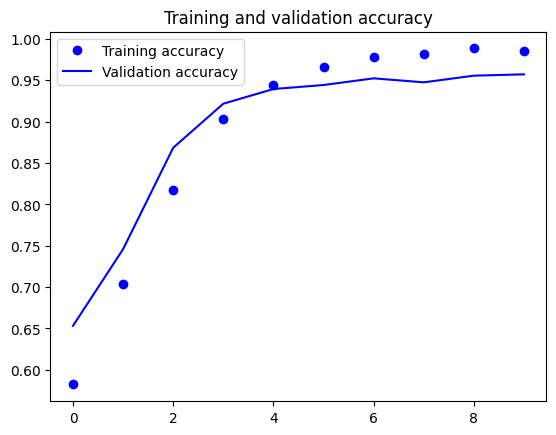

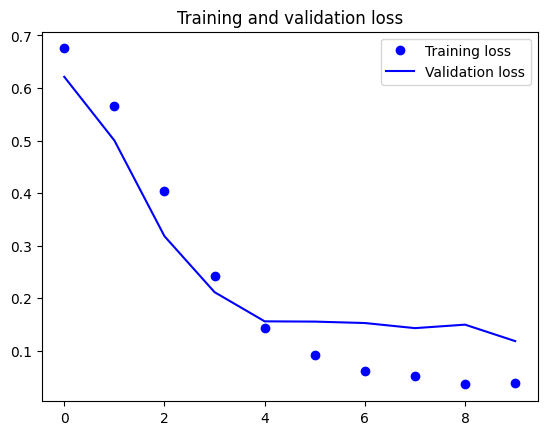

In [4]:
import matplotlib.pyplot as plt

# Afficher les courbes d'apprentissage
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [5]:
model.save("breast_cancer_model.keras")

In [6]:
from tensorflow import keras

# Charger le modèle
model = keras.models.load_model("breast_cancer_model.keras")

# Vérifier l'architecture du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,914,309 (37.82 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,540 (25.21 MB)

In [7]:
import numpy as np
import cv2

# Fonction pour prédire une nouvelle image
def predict_image(image_path):
    # Charger l'image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Erreur : Impossible de charger l'image à partir de {image_path}")
        return None
    
    # Prétraiter l'image
    img = cv2.resize(img, (128, 128))  # Redimensionner à la taille attendue par le modèle
    img = img / 255.0  # Normaliser les pixels
    img = np.expand_dims(img, axis=0)  # Ajouter une dimension pour le batch
    
    # Faire la prédiction
    prediction = model.predict(img)
    if prediction[0] > 0.5:
        return "Malignant"
    else:
        return "Benign"

# Chemin de la nouvelle image
image_path = r"C:\Users\HP\Downloads\archive (4)\try\A1.JPG"  # Utilisez le nom de votre image

# Faire la prédiction
result = predict_image(image_path)
if result is not None:
    print(f"La prédiction pour l'image est : {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
La prédiction pour l'image est : Benign


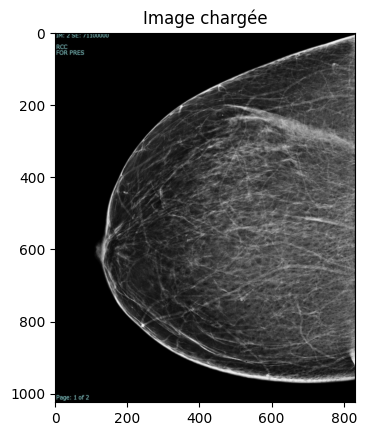

In [8]:
img = cv2.imread(image_path)
if img is not None:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convertir BGR en RGB pour l'affichage
    plt.title("Image chargée")
    plt.show()